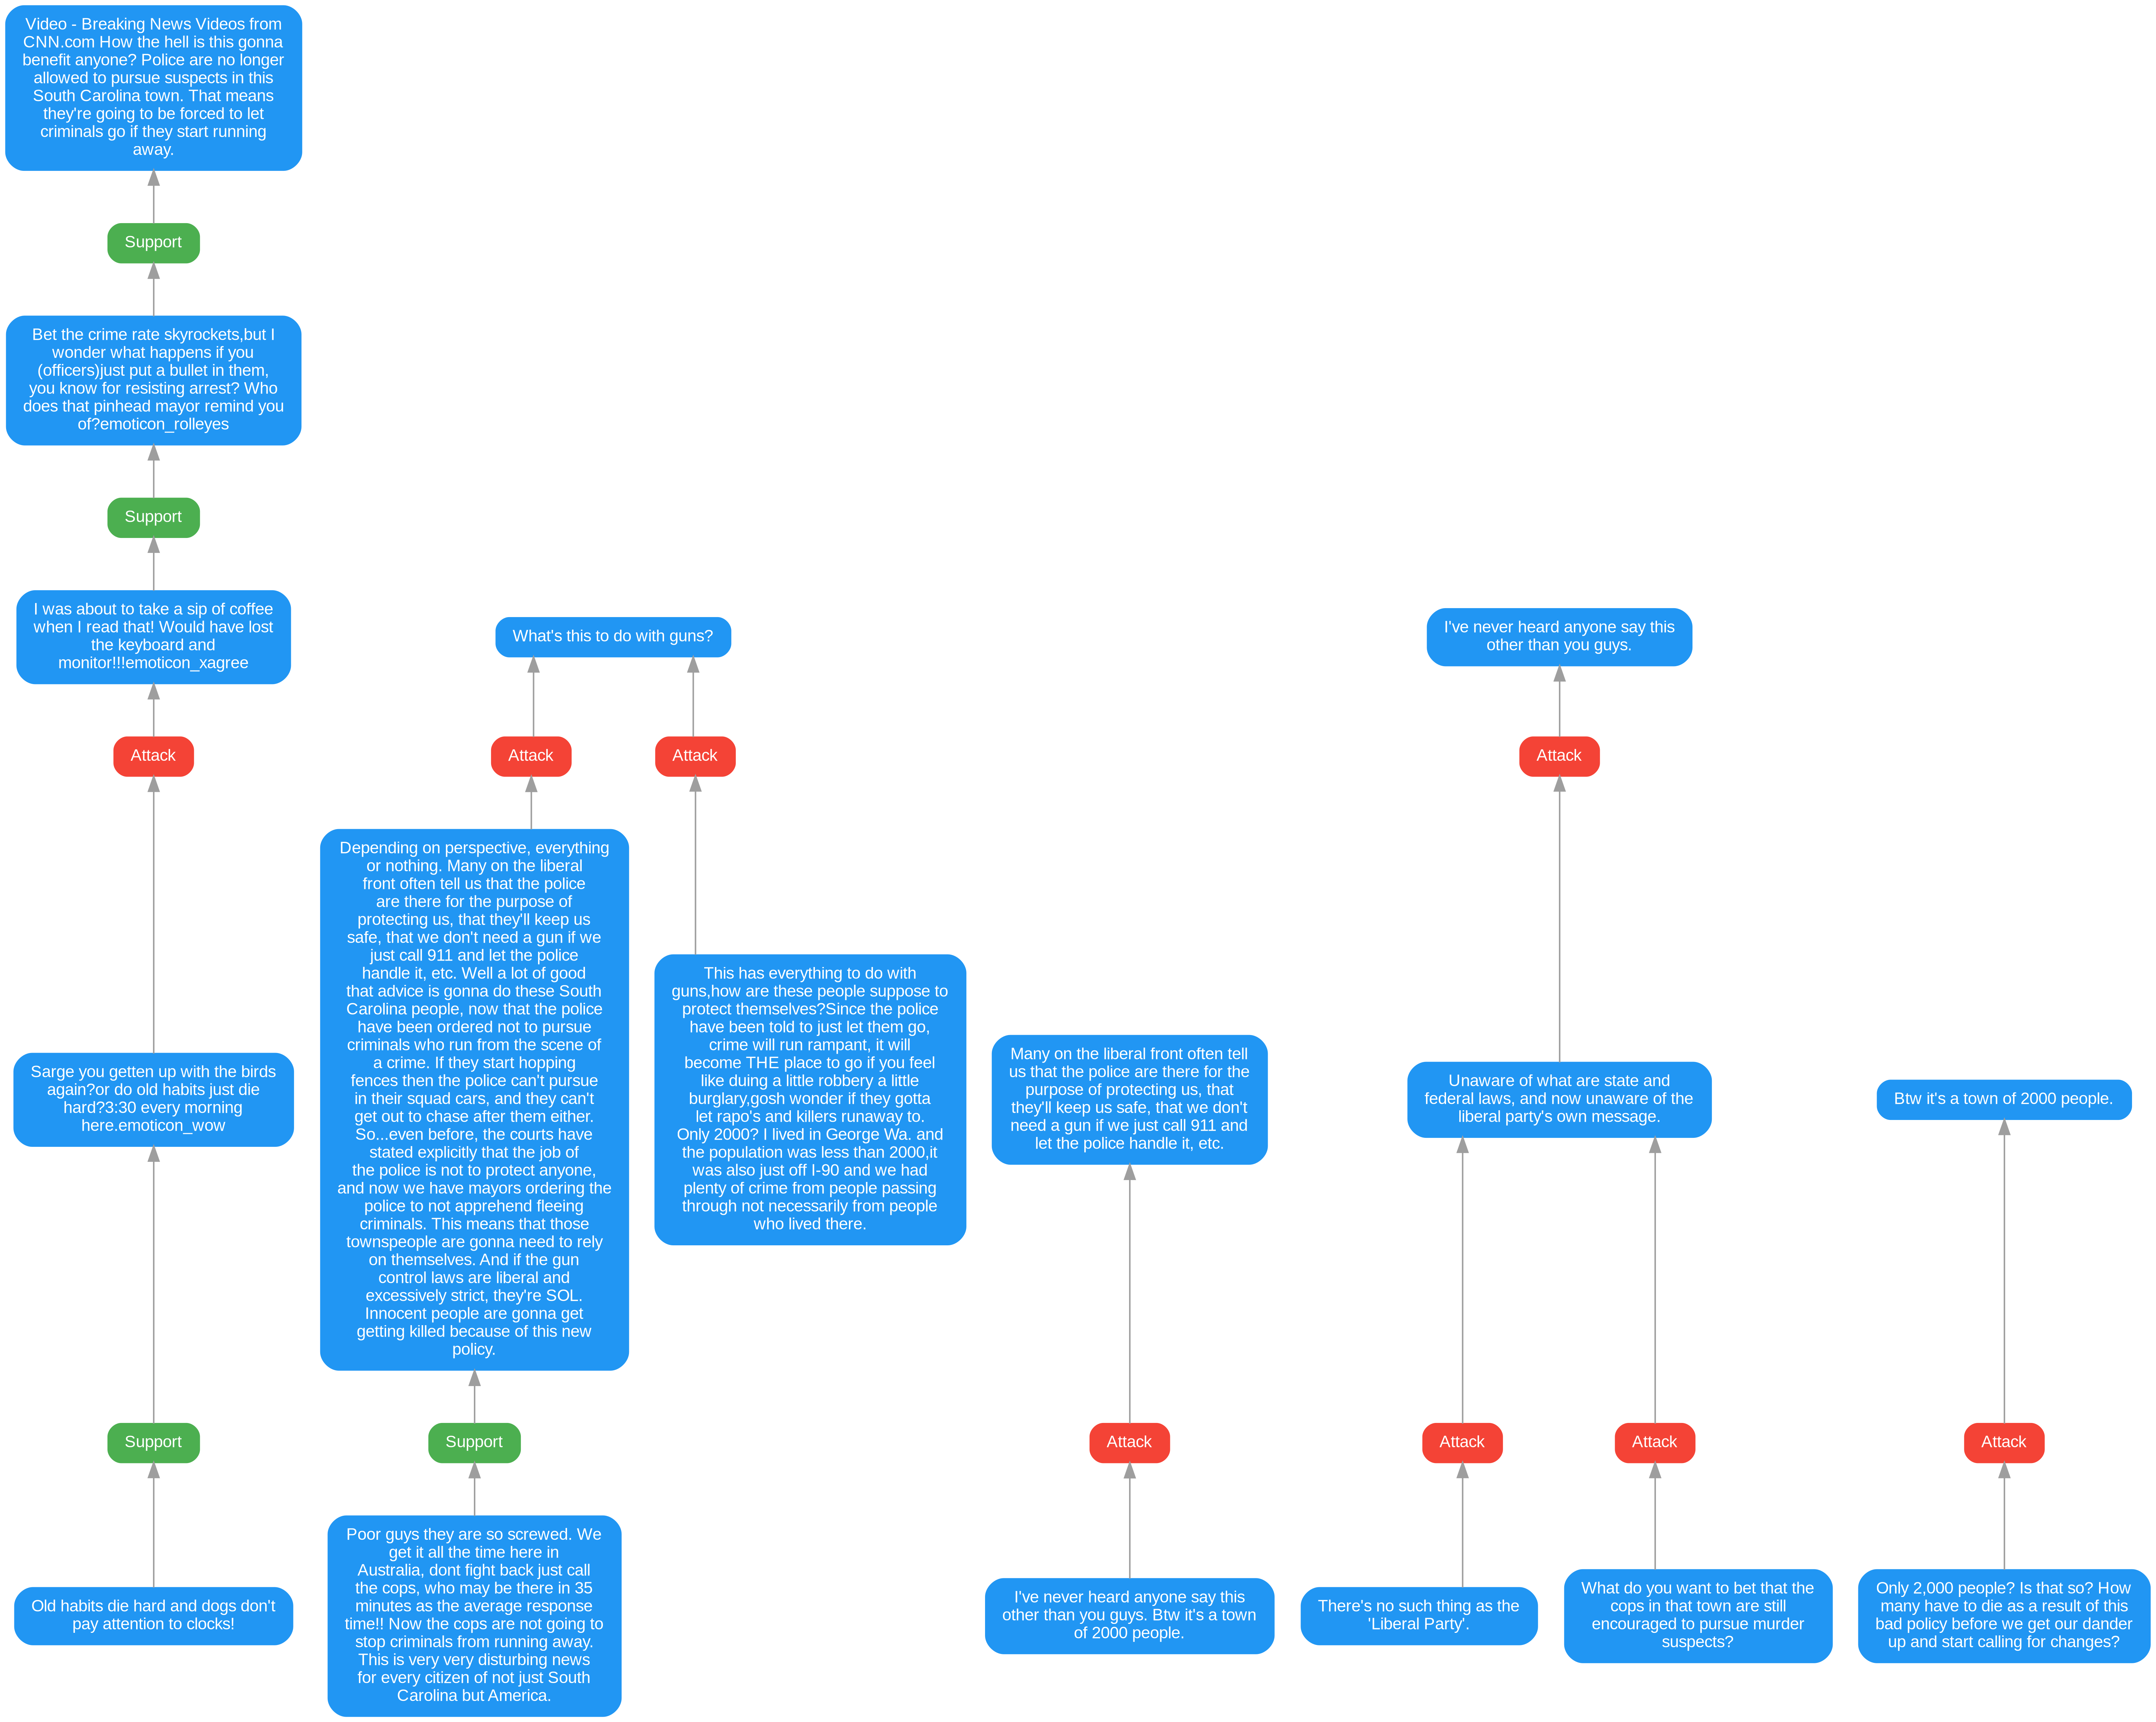

In [2]:
import arguebuf as ab
from glob import glob
from PIL import Image

PATH = "../../arguebase-public"

file = glob(f"{PATH}/iac/format=aif,lang=en/*.json")[0]
graph = ab.load.file(file)
ab.render.graphviz(ab.dump.graphviz(graph), "test.png")
Image.open("test.png")

In [3]:
print(graph.major_claim)
print(list(graph.root_nodes))

None
[AtomNode(161849, What's this to do with guns?), AtomNode(161846, Video - Breaking News Videos from CNN.com How the hell is this gonna benefit anyone? Police are no longer allowed to pursue suspects in this South Carolina town. That means they're going to be forced to let criminals go if they start running away.), AtomNode(161854, Many on the liberal front often tell us that the police are there for the purpose of protecting us, that they'll keep us safe, that we don't need a gun if we just call 911 and let the police handle it, etc.), AtomNode(161862, Btw it's a town of 2000 people.), AtomNode(161859, I've never heard anyone say this other than you guys.)]


In [4]:
from util import layerize

root = list(graph.root_nodes)[1]
layerize(graph, root)

[[AtomNode(161846, Video - Breaking News Videos from CNN.com How the hell is this gonna benefit anyone? Police are no longer allowed to pursue suspects in this South Carolina town. That means they're going to be forced to let criminals go if they start running away.)],
 [SchemeNode(161848, Support, Default)],
 [AtomNode(161847, Bet the crime rate skyrockets,but I wonder what happens if you (officers)just put a bullet in them, you know for resisting arrest? Who does that pinhead mayor remind you of?emoticon_rolleyes)],
 [SchemeNode(161870, Support, Default)],
 [AtomNode(161869, I was about to take a sip of coffee when I read that! Would have lost the keyboard and monitor!!!emoticon_xagree)],
 [SchemeNode(161872, Attack, Default)],
 [AtomNode(161871, Sarge you getten up with the birds again?or do old habits just die hard?3:30 every morning here.emoticon_wow)],
 [SchemeNode(161874, Support, Default)],
 [AtomNode(161873, Old habits die hard and dogs don't pay attention to clocks!)]]

In [5]:
from srip import convert_from_AbstractNode_to_Node, default_weight, SRIP_Config, Node, _SRIP2_r
import matplotlib.pyplot as plt
from util import find_major_claim
from typing import Callable
from pathlib import Path
import matplotlib.patches as patches

def SRIP2(
    r: Node,
    graph: ab.Graph,
    path: Path,
    weight_func: Callable,
    config: SRIP_Config = SRIP_Config(),
):
    """
    Draws a space reclaiming icicle plots (SRIP2) from https://doi.org/10.1109/PacificVis48177.2020.4908 and saves it to path.

    Parameters:
    - r (Node): The root node (major claim).
    - num_layers (int): The number of layers. Obtain this as len(layerize(graph, find_major_claim(graph)).
    - path (Path): The path to save the plot.
    """
    plot = plt.figure()
    h = config.H / len(layerize(graph, find_major_claim(graph)))  # height of each layer
    _, ax = plt.subplots(figsize=(config.W, config.H))
    ax.set_xlim(0 - 0.001, config.W + 0.001)
    ax.set_ylim(config.H + 0.001, 0 - 0.001)
    ax.set_axis_off()
    # remove white border
    plot.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # computeWeights()
    o = (config.W - config.epsilon) / 2

    points = [(o, 0), (config.W - o, 0), (config.W - o, h), (o, h)]
    ax.add_patch(patches.Polygon(points, fill=True, color=r.color()))
    r.set_ll_width(0, h, config.W)
    C = r.children
    if len(C) > 0:
        _SRIP2_r(
            1, [r], len(C), weight_func(C), config.W, 0, h, weight_func, config, ax
        )
    plt.savefig(path, bbox_inches=0, pad_inches=0, dpi=config.dpi)
    plt.close("all")

root = list(graph.root_nodes)[1]
config = SRIP_Config()
config.W = 2
SRIP2(convert_from_AbstractNode_to_Node(graph, root), graph, Path(f"test_srip_1.png"), default_weight, config=config)
i = Image.open("test_srip_1.png")
print(i.height, i.width)
i

ImportError: cannot import name 'find_major_claim' from 'util' (/root/vision-retrieval/vis/util.py)

In [ ]:

config = SRIP_Config()
config.W = 2
print(config.H)
for i in range(len(graph.root_nodes)):
    root = list(graph.root_nodes)[i]
    SRIP2(convert_from_AbstractNode_to_Node(graph, root), graph, Path(f"test_srip_{i}.png"), default_weight,config=config)

10


In [ ]:
list(graph.root_nodes)[2]

AtomNode(161849, What's this to do with guns?)

1000 1040


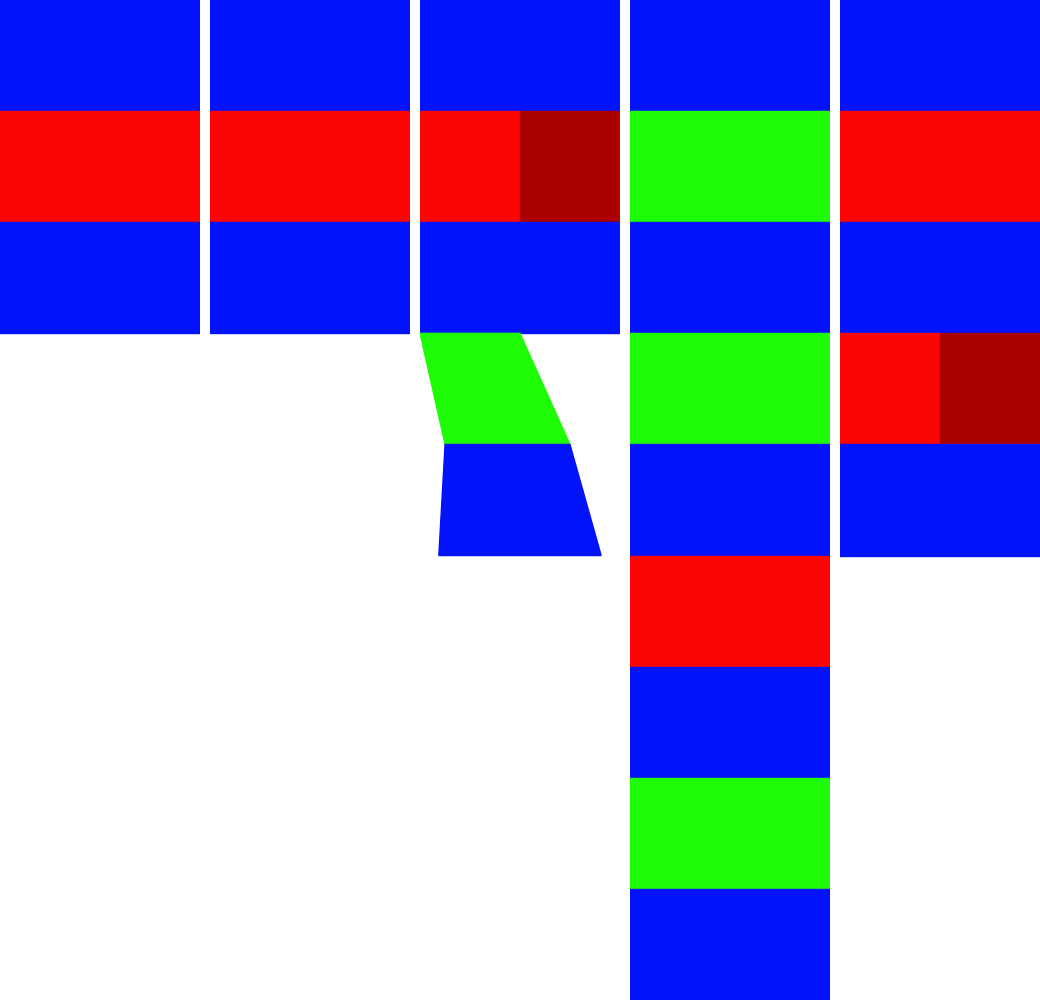

In [ ]:
# Open images
image_list = [f"test_srip_{i}.png" for i in range(len(graph.root_nodes))]
images = [Image.open(img) for img in image_list]

# Define margin size (in pixels)
margin = 10  # Adjust this value for wider or narrower margins

# Calculate total width including margins
total_width = sum(img.width for img in images) + margin * (len(images) - 1)
outer_height = images[0].height  # Assuming all images have the same height

# Create a new image with white background
result_image = Image.new('RGB', (total_width, outer_height), color=(255, 255, 255))

# Paste images horizontally with margins
current_width = 0
for img in images:
    result_image.paste(img, (current_width, 0))
    current_width += img.width + margin  # Add margin after each image except the last one

# Save the result
result_image.save('concatenated_image_with_margins.jpg')
print(result_image.height, result_image.width)
result_image

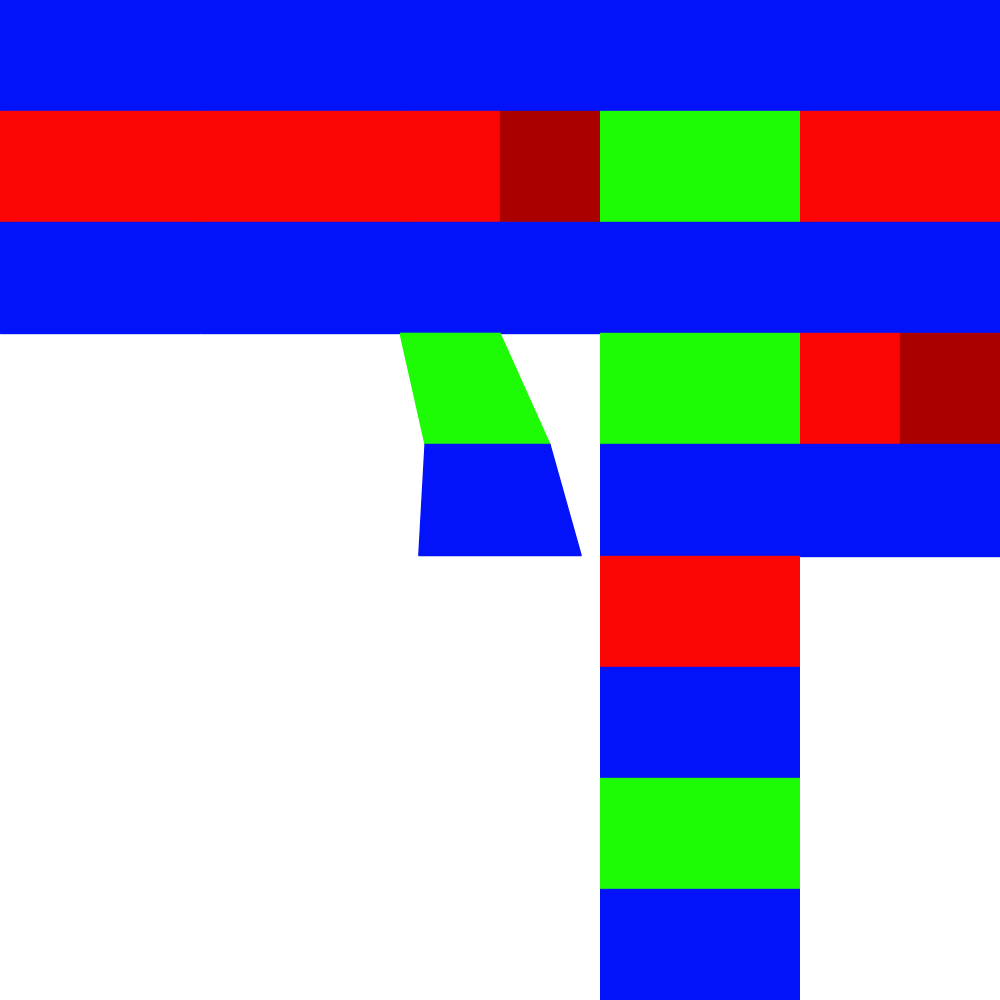

In [ ]:
from PIL import Image

# Calculate total width and get height
total_width = sum(img.width for img in images)
outer_height = images[0].height  # Assuming all images have the same height

# Create a new image with the appropriate dimensions
result_image = Image.new('RGB', (total_width, outer_height))

# Paste images horizontally
current_width = 0
for img in images:
    result_image.paste(img, (current_width, 0))
    current_width += img.width

result_image


In [ ]:
import arguebuf as ab
from pathlib import Path
import queue
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from util import find_major_claim, normalize

inode_colors = {
    0: "#0212f9",
    1: "#020b82",
    2: "#5863fc",
}
attack_colors = {
    0: "#fc0505",
    1: "#aa0000",
    2: "#fc5353",
}
support_colors = {
    0: "#1dfc05",
    1: "#11ad00",
    2: "#52fc3f",
}


class NodeWrapper:
    def __init__(self, node, parent, x_pos, y_pos, width=256):
        self.node = node
        self.parent = parent
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.width = width

    def __str__(self) -> str:
        return f"{self.node.id} ({self.node.label}) {self.y_pos} - {self.width}"


def render(graph: ab.Graph, path: Path, normalize_graph=False, dpi=100, major_claim=None, outer_height=10, outer_width=10) -> None:
    if normalize_graph:
        normalize(graph)
    q = queue.Queue()
    if major_claim is None:
        major_claim = find_major_claim(graph)
    q.put(NodeWrapper(major_claim, None, 0, 0))
    nodes = []
    while not q.empty():
        n = q.get()
        nodes.append(n)
        children = graph.incoming_nodes(n.node)
        for i, c in enumerate(children):
            width = n.width / len(children)
            q.put(NodeWrapper(c, n, n.x_pos + i * width, n.y_pos + 1, width))
    max_height = nodes[-1].y_pos + 1
    height = outer_height / max_height

    _, ax = plt.subplots(figsize=(outer_width, outer_height))
    ax.set_xlim(0, outer_width)
    ax.set_ylim(0, outer_height)
    # ax.set_aspect("equal")
    x_number = 0
    y_level = 0
    for n in nodes:
        color = inode_colors[x_number % 3]
        if isinstance(n.node, ab.SchemeNode):
            color = (
                attack_colors[x_number % 3]
                if n.node.label == "Attack"
                else support_colors[x_number % 3]
            )
        ax.add_patch(
            patches.Rectangle(
                (n.x_pos, n.y_pos * height),
                n.width,
                height,
                edgecolor="black",
                facecolor=color,
            )
        )
        x_number += 1
        if n.y_pos > y_level:
            y_level = n.y_pos
            x_number = 0

        # ax.text(n.x_pos + n.width / 2, -n.y_pos + rand, n.node.label, ha='center', va='center')

    ax.set_axis_off()
    # remove white border
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.savefig(path, bbox_inches=0, pad_inches=0, dpi=dpi)
    plt.close("all")


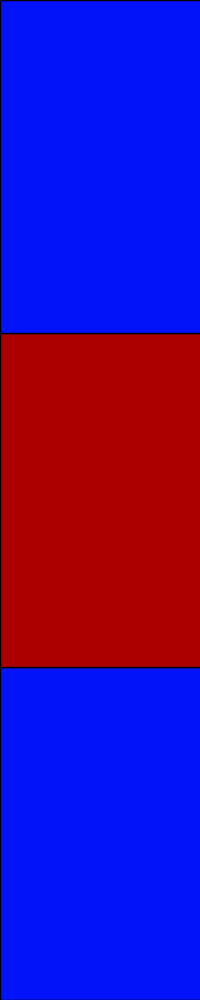

In [ ]:
for i in range(len(graph.root_nodes)):
    root = list(graph.root_nodes)[i]
    render(graph, Path(f"test_logical_{i}.png"), major_claim=root, outer_height=10, outer_width=2)

Image.open("test_logical_0.png")

1000 1040


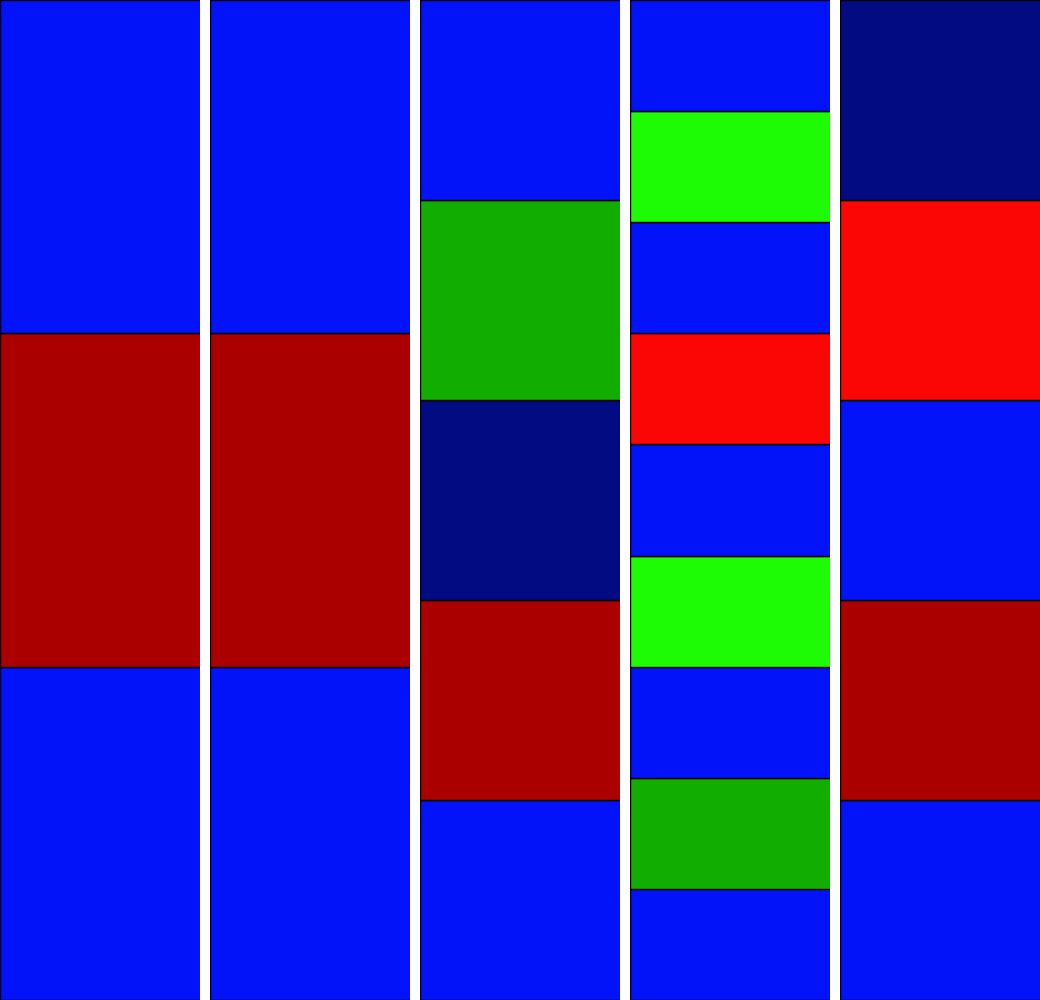

In [ ]:
# Open images
image_list = [f"test_logical_{i}.png" for i in range(len(graph.root_nodes))]
images = [Image.open(img) for img in image_list]

# Define margin size (in pixels)
margin = 10  # Adjust this value for wider or narrower margins

# Calculate total width including margins
total_width = sum(img.width for img in images) + margin * (len(images) - 1)
outer_height = images[0].height  # Assuming all images have the same height

# Create a new image with white background
result_image = Image.new('RGB', (total_width, outer_height), color=(255, 255, 255))

# Paste images horizontally with margins
current_width = 0
for img in images:
    result_image.paste(img, (current_width, 0))
    current_width += img.width + margin  # Add margin after each image except the last one

# Save the result
result_image.save('concatenated_image_with_margins.jpg')
print(result_image.height, result_image.width)
result_image

In [ ]:
from treemaps import build_tree, get_treemap_rects, colors
def visualize_treemap(
    graphpath: str, savepath: str | Path, height: int = 256, width: int = 256, root: ab.AbstractNode | None = None
):
    graph = ab.load.file(graphpath)
    visualize_treemap_inmem(graph, savepath, height, width)


def visualize_treemap_inmem(
    graph: ab.Graph, savepath: str | Path, height: int = 256, width: int = 256, root: ab.AbstractNode | None = None
):
    if root is None and graph.root_node is None:
        raise ValueError("Root node is ambiguous. Please provide a root node.")
    tree = build_tree(graph, root) if root is not None else build_tree(graph, graph.root_node)

    # get treemap rects
    rects = get_treemap_rects(tree, 0, 0, width, height, True)

    # create png
    draw_treemap(rects, height, width, savepath)

def draw_treemap(rects, height, width, savepath: str | Path):
    fig = plt.figure(figsize=(width, height), dpi=100)

    # Create axes that fill the entire figure
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    # ax.set_aspect("equal", adjustable="box")
    ax.axis("off")  # Remove axis labeling
    ax.margins(0)  # Remove padding
    for rect in rects:
        if "label" not in rect and rect["label"] != None:
            continue
        ax.add_patch(
            patches.Rectangle(
                (rect["x"], rect["y"]),
                rect["width"],
                rect["height"],
                fill=True,
                facecolor=colors.get(rect["label"], "white"),
                linewidth=1,
                edgecolor="black",
            )
        )

    plt.savefig(savepath, bbox_inches=0, pad_inches=0, dpi=100)
    plt.close()

In [ ]:
for i in range(len(graph.root_nodes)):
    root = list(graph.root_nodes)[i]
    visualize_treemap_inmem(graph, Path(f"test_treemaps_{i}.png"), root=root, height=10, width=2)


1000 1040


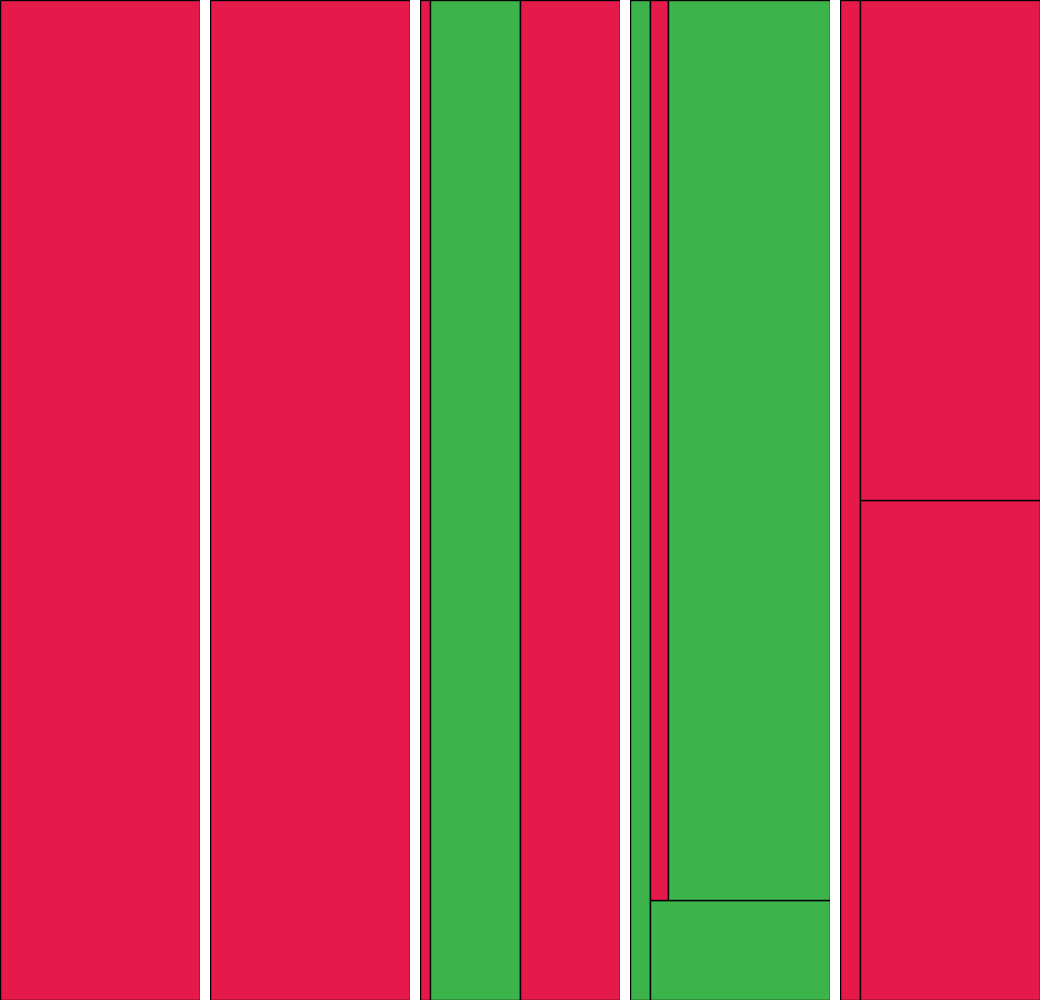

In [ ]:
# Open images
image_list = [f"test_treemaps_{i}.png" for i in range(len(graph.root_nodes))]
images = [Image.open(img) for img in image_list]

# Define margin size (in pixels)
margin = 10  # Adjust this value for wider or narrower margins

# Calculate total width including margins
total_width = sum(img.width for img in images) + margin * (len(images) - 1)
outer_height = images[0].height  # Assuming all images have the same height

# Create a new image with white background
result_image = Image.new('RGB', (total_width, outer_height), color=(255, 255, 255))

# Paste images horizontally with margins
current_width = 0
for img in images:
    result_image.paste(img, (current_width, 0))
    current_width += img.width + margin  # Add margin after each image except the last one

# Save the result
result_image.save('concatenated_image_with_margins.jpg')
print(result_image.height, result_image.width)
result_image

In [ ]:
from srip import SRIP1, SRIP2, SRIP_Config, default_weight
from enum import Enum
import arguebuf as ab
from PIL import Image
import typer
from pathlib import Path
from logical import render as logical_render
from treemaps import visualize_treemap_inmem

app = typer.Typer()

class RenderMethod(str, Enum):
    SRIP1 = "srip1"
    SRIP2 = "srip2"
    LOGICAL = "logical"
    TREEMAP = "treemap"

@app.command()
def render(graph_path: str, output_path: Path, method: RenderMethod = RenderMethod.SRIP2, dpi: int = 100, normalize_height: bool = False) -> None:
    graph = ab.load.file(graph_path)
    _render(graph, output_path, method, dpi, normalize_height)


def _render(graph: ab.Graph, output_path: Path, method: RenderMethod = RenderMethod.SRIP2, dpi: int = 100, normalize_height: bool = False) -> None:
    roots = graph.root_nodes
    if method == RenderMethod.SRIP2:
        config = SRIP_Config()
        config.W = 10 / len(roots)
        config.dpi = dpi
        config.normalize_height = normalize_height
        images = [SRIP2(root, graph, default_weight, config=config) for root in roots]
        image = images[0]
        if len(images) > 1:
            image = _concat_images(images)
        image.show()
        image.save(output_path)

def _concat_images(images: list[Image.Image], margin: int = 10) -> Image.Image:
    margin = 10  # Adjust this value for wider or narrower margins

    # Calculate total width including margins
    total_width = sum(img.width for img in images) + margin * (len(images) - 1)
    outer_height = images[0].height  # Assuming all images have the same height

    # Create a new image with white background
    result_image = Image.new('RGB', (total_width, outer_height), color=(255, 255, 255))

    # Paste images horizontally with margins
    current_width = 0
    for img in images:
        result_image.paste(img, (current_width, 0))
        current_width += img.width + margin  # Add margin after each image except the last one

    # resize to square
    result_image = result_image.resize((outer_height, outer_height))

    # Save the result
    return result_image


1000 1000


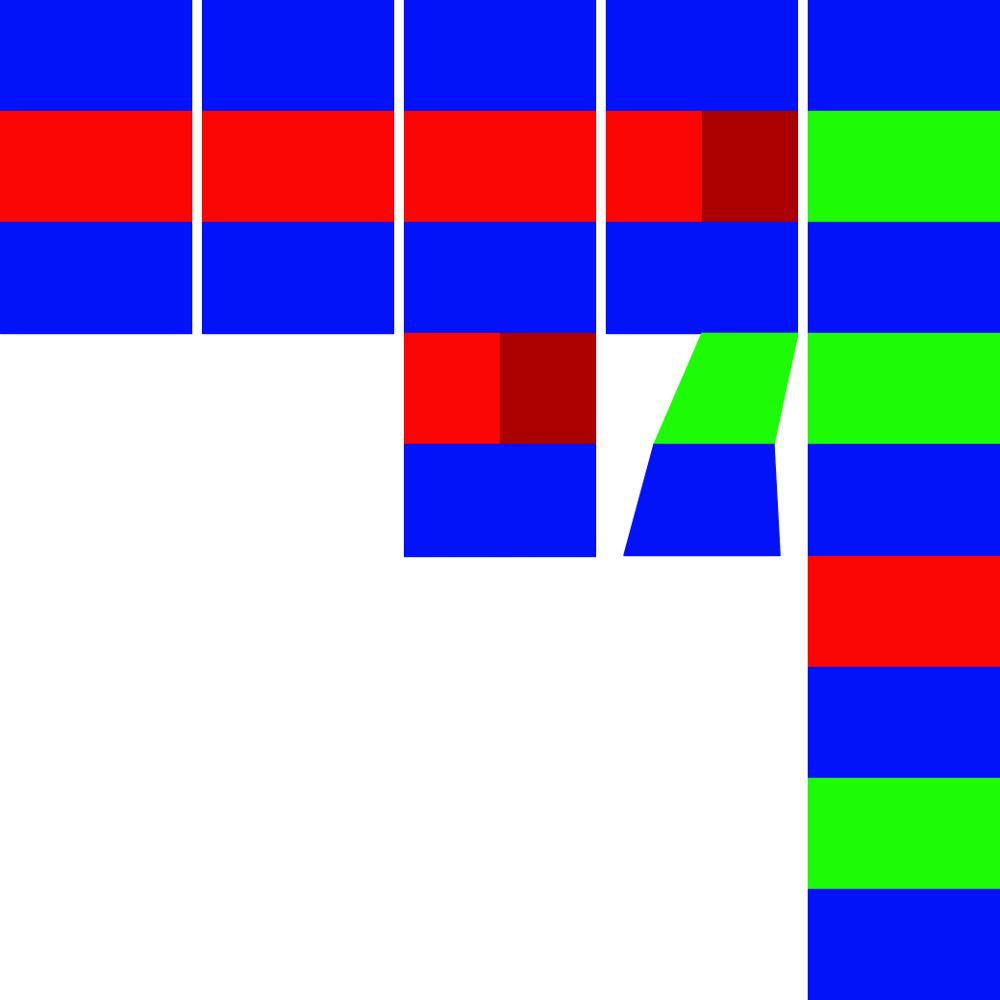

<Figure size 640x480 with 0 Axes>

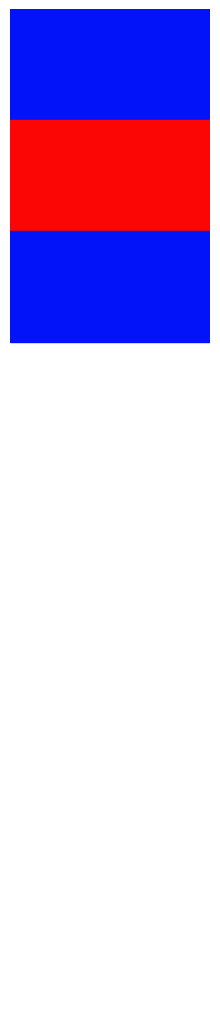

<Figure size 640x480 with 0 Axes>

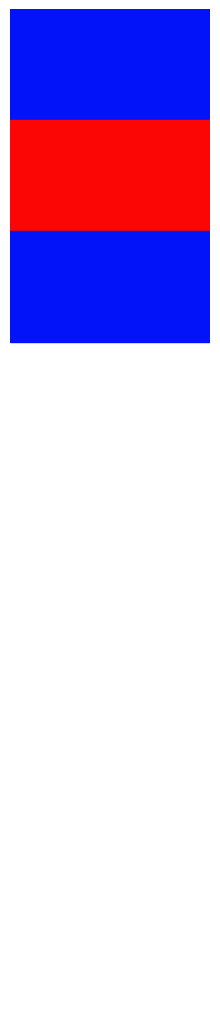

<Figure size 640x480 with 0 Axes>

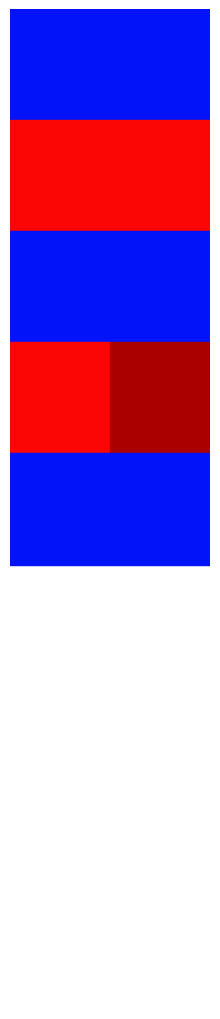

<Figure size 640x480 with 0 Axes>

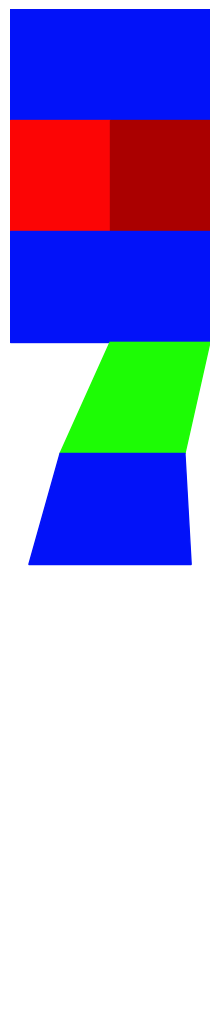

<Figure size 640x480 with 0 Axes>

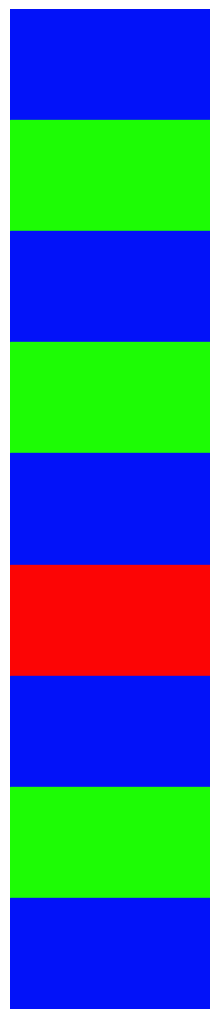

In [ ]:
from srip import SRIP2, SRIP_Config, default_weight
graph = ab.load.file("/root/vision-retrieval/vis/testgraphs/nodeset8725.json")
roots = graph.root_nodes
config = SRIP_Config()
config.W = 10 / len(roots)
config.dpi = 100
config.normalize_height = True
images = [SRIP2(root, graph, default_weight, config=config) for root in roots]
image = images[0]
if len(images) > 1:
    image = _concat_images(images)
print(image.height, image.width)
image

In [26]:
import queue
from logical import inode_colors, attack_colors, support_colors
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class NodeWrapper:
    def __init__(self, node, x_pos, y_pos, width=10):
        self.node = node
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.width = width

    def __str__(self) -> str:
        return f"{self.node.id} ({self.node.label}) {self.y_pos} - {self.width}"

def render(graph: ab.Graph, root: ab.AbstractNode, outer_height: float = 10, outer_width: float = 10, dpi=50) -> Image.Image:
    # TODO: make option with normalized height
    q = queue.Queue()
    q.put(NodeWrapper(root, 0, -1))
    nodes = []
    # BFS
    min_height = 0
    while not q.empty():
        n = q.get()
        nodes.append(n)
        y_level = n.y_pos
        if y_level < min_height:
            min_height = y_level
        children = graph.incoming_nodes(n.node)
        for i, c in enumerate(children):
            width = n.width / len(children)
            q.put(NodeWrapper(c, n.x_pos + i * width, y_level - 1, width))
            

    height = outer_height / abs(min_height)
    _, ax = plt.subplots(figsize=(outer_width, outer_height))
    ax.set_xlim(0, outer_width)
    ax.set_ylim(0, outer_height)
    # ax.set_aspect("equal")
    y_level = 0
    for n in nodes:
        color = inode_colors[0]
        if isinstance(n.node, ab.SchemeNode):
            color = (
                attack_colors[0]
                if n.node.label == "Attack"
                else support_colors[0]
            )
        print(n.node.label, n.x_pos, outer_height - n.y_pos * height, n.width, height)
        ax.add_patch(
            patches.Rectangle(
                (n.x_pos, outer_height + n.y_pos * height),
                n.width,
                height,
                edgecolor="black",
                facecolor=color,
            ))

    ax.set_axis_off()
    # remove white border
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

What's this to do with guns? 0 12.0 10 2.0
Attack 0.0 14.0 5.0 2.0
Attack 5.0 14.0 5.0 2.0
Depending on perspective, everything or nothing. Many on the liberal front often tell us that the police are there for the purpose of protecting us, that they'll keep us safe, that we don't need a gun if we just call 911 and let the police handle it, etc. Well a lot of good that advice is gonna do these South Carolina people, now that the police have been ordered not to pursue criminals who run from the scene of a crime. If they start hopping fences then the police can't pursue in their squad cars, and they can't get out to chase after them either. So...even before, the courts have stated explicitly that the job of the police is not to protect anyone, and now we have mayors ordering the police to not apprehend fleeing criminals. This means that those townspeople are gonna need to rely on themselves. And if the gun control laws are liberal and excessively strict, they're SOL. Innocent people are g

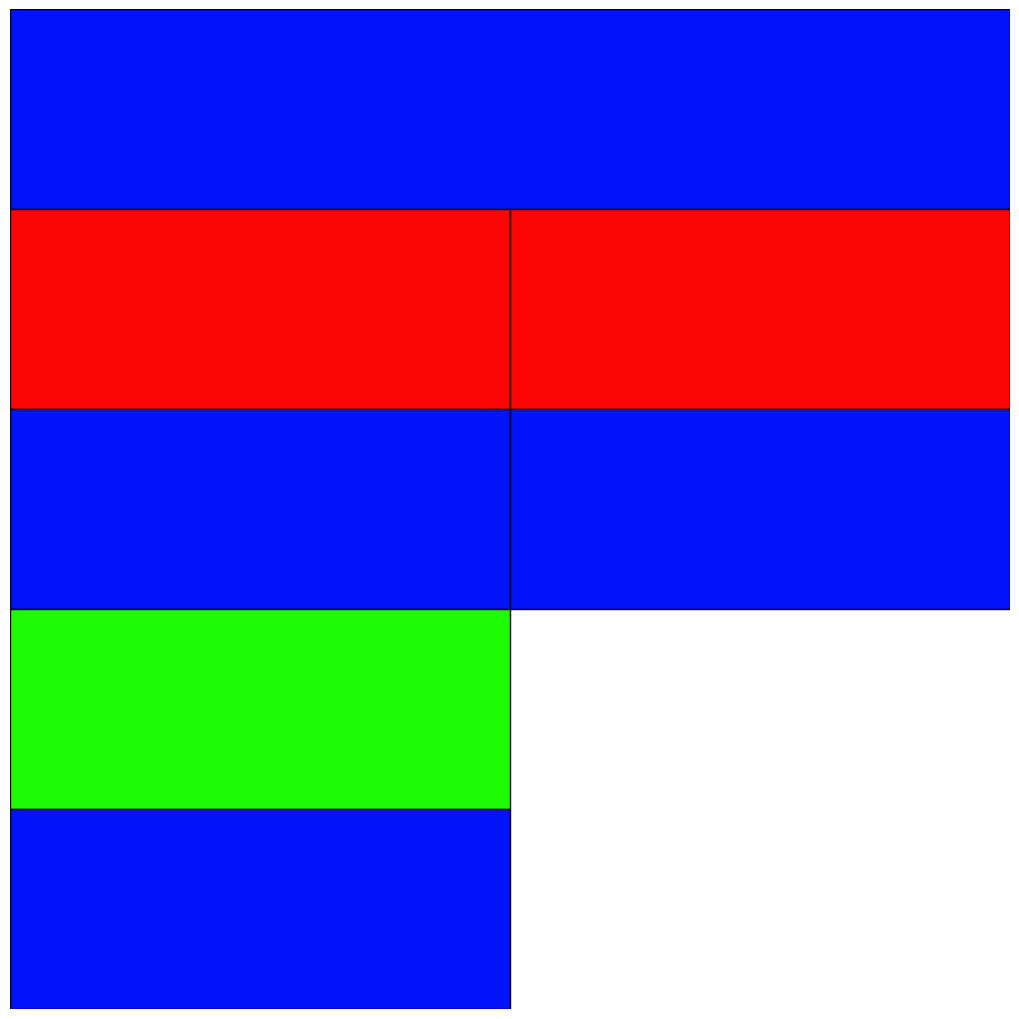

In [28]:
from util import find_heighest_root_node
render(graph, list(graph.root_nodes)[0], outer_height=10, outer_width=10)